# DrawPSF for paper


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS

- creation date : May 15th 2020

- swap HOE because dispersion was along Y


In [204]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
import pandas as pd
import itertools
import matplotlib.gridspec as gridspec
from matplotlib.patches import Circle,Ellipse

In [205]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (13, 13),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'font.size': 14}
plt.rcParams.update(params)

## Constants for conversions

In [206]:
m_to_mm=1000.
mm_to_m=1e-3
inch_to_mm=25.4
mm_to_inch=1./inch_to_mm
micr_to_m=1e-6
micr_to_mm=1e-3
m_to_micr=1./micr_to_m
m_to_cm=100.
m_to_nm=1e9
nm_to_m=1./m_to_nm

In [207]:
arcdeg_to_arcmin=60.
arcmin_to_arcdeg=1./arcdeg_to_arcmin
arcmin_to_arcsec=60.
arcdeg_to_arcsec=arcdeg_to_arcmin*arcmin_to_arcsec
arcsec_to_arcdeg=1./arcdeg_to_arcsec

In [208]:
deg_to_rad=np.pi/180.

In [209]:
rad_to_deg=1./deg_to_rad
rad_to_arcsec=rad_to_deg*arcdeg_to_arcsec
rad_to_arcmin=rad_to_deg*arcdeg_to_arcmin
arcmin_to_rad=1./rad_to_arcmin

## Configuration parameters at the telescope

#### telescope

In [210]:
Tel_Focal_Length=12.6 # m : Focal length of the telescope
Tel_Diameter=0.9 # m : Diameter of the telescope    
Tel_Fnum=Tel_Focal_Length/Tel_Diameter
pltscale=206265/(Tel_Focal_Length*m_to_mm)  # arcsec per mm

#### filter

In [211]:
Filt_D=0.05769 # m distance of the filter position wrt CCD plane
Filt_size=3*inch_to_mm

#### CCD detector

In [212]:
Det_xpic=24.0 # microns per pixel
#Det_NbPix=2048 # number of pixels per CCD side
Det_NbPix=2512 # number of pixels per CCD side For 400 only
Det_size=Det_xpic*Det_NbPix*micr_to_mm # CCD size in mm, 5 cm or 2 inch

## Input file

In [213]:
# number of rays
NBEAM_X=11
NBEAM_Y=11
NBEAM=NBEAM_X*NBEAM_Y
NWL=4
NBTOT=NBEAM*NWL

In [214]:
theta_x=0.  # angle in arcmin
theta_y=0.  # angle in arcmin 

In [215]:
theta_x_num=int(theta_x*10)
theta_y_num=int(theta_y*10)

In [216]:
if theta_x_num>0:
    theta_nstr='{:0>2}'.format(theta_x_num)
    theta_x_str="p"+theta_nstr
else:
    theta_nstr='{:0>2}'.format(-theta_x_num)
    theta_x_str="m"+theta_nstr

In [217]:
if theta_y_num>0:
    theta_nstr='{:0>2}'.format(theta_y_num)
    theta_y_str="p"+theta_nstr
else:
    theta_nstr='{:0>2}'.format(-theta_y_num)
    theta_y_str="m"+theta_nstr

In [218]:
Beam4_Rayfile="Beam4_Rayfile_{:d}_allwl_{}_{}".format(NBTOT,theta_x_str,theta_y_str)

In [219]:
Beam4_Rayfile

'Beam4_Rayfile_484_allwl_m00_m00'

In [220]:
order="OP1"
order_str="+1"

# Read input files

In [221]:
FLAG_R350=True # show RON350 instead of R200

In [222]:
rayfile_hoe=Beam4_Rayfile+"_RAY_HOE_OUT.xlsx"
rayfile_R400=Beam4_Rayfile+"_RAY_RON400_OUT.xlsx"
rayfile_R200=Beam4_Rayfile+"_RAY_RON200_OUT.xlsx"
rayfile_R350=Beam4_Rayfile+"_RAY_RON350_OUT.xlsx"

In [223]:
input_hoe = pd.ExcelFile(rayfile_hoe)
df_hoe = input_hoe.parse(index_row=0,header=1)
df_hoe=df_hoe.iloc[0:NBTOT]

In [224]:
# rename columns otherwise they are not recognize and swap X,Y
#df_hoe.columns = ["X0","Y0","Z0","U0","V0","W0","wave","X1","Y1","Z1","X2","Y2","Z2","X3","Y3","Z3","Xfinal","Yfinal","Zfinal","Notes"]
df_hoe.columns = ["Y0","X0","Z0","V0","U0","W0","wave","Y1","X1","Z1","Y2","X2","Z2","Y3","X3","Z3","Yfinal","Xfinal","Zfinal","Notes"]

In [225]:
df_hoe

,Y0,X0,Z0,V0,U0,W0,wave,Y1,X1,Z1,Y2,X2,Z2,Y3,X3,Z3,Yfinal,Xfinal,Zfinal,Notes
0,-2.91378,-2.91378,0,0.0252377,0.0252377,0.999363,0.0004,-1.45664,-1.45664,57.7,-1.43476,-1.43476,59,-0.00823,8.12086,115.814,-0.00823,8.12086,115.8135,OK
1,-2.33103,-2.91378,0,0.0201925,0.0252406,0.999478,0.0004,-1.16531,-1.45664,57.7,-1.14781,-1.43476,59,-0.00658,8.12081,115.814,-0.00658,8.12081,115.8135,OK
2,-1.74827,-2.91378,0,0.0151457,0.0252429,0.999567,0.0004,-0.873985,-1.45664,57.7,-0.86086,-1.43476,59,-0.00494,8.12077,115.814,-0.00494,8.12077,115.8135,OK
3,-1.16551,-2.91378,0,0.0100978,0.0252445,0.99963,0.0004,-0.582655,-1.45664,57.7,-0.5739,-1.43476,59,-0.00329,8.12074,115.814,-0.00329,8.12074,115.8135,OK
4,-0.582757,-2.91378,0,0.0050491,0.0252454,0.999668,0.0004,-0.291327,-1.45664,57.7,-0.28695,-1.43476,59,-0.00164,8.12071,115.814,-0.00164,8.12071,115.8135,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.582757,2.91378,0,-0.0050491,-0.0252454,0.999668,0.001,0.291327,1.45664,57.7,0.28695,1.43476,59,-0.00755,21.4428,115.814,-0.00755,21.4428,115.8135,OK
480,1.16551,2.91378,0,-0.0100978,-0.0252445,0.99963,0.001,0.582655,1.45664,57.7,0.5739,1.43476,59,-0.01509,21.4428,115.814,-0.01509,21.4428,115.8135,OK
481,1.74827,2.91378,0,-0.0151457,-0.0252429,0.999567,0.001,0.873985,1.45664,57.7,0.86086,1.43476,59,-0.02263,21.4429,115.814,-0.02263,21.4429,115.8135,OK
482,2.33103,2.91378,0,-0.0201925,-0.0252406,0.999478,0.001,1.16531,1.45664,57.7,1.14781,1.43476,59,-0.03018,21.4429,115.814,-0.03018,21.4429,115.8135,OK


In [226]:
input_R400 = pd.ExcelFile(rayfile_R400)
df_R400 = input_R400.parse(index_row=0,header=1)
df_R400=df_R400.iloc[0:NBTOT]

In [227]:
# rename columns otherwise they are not recognize
df_R400.columns = ["X0","Y0","Z0","U0","V0","W0","wave","X1","Y1","Z1","X2","Y2","Z2","X3","Y3","Z3","Xfinal","Yfinal","Zfinal","Notes"]

In [228]:
df_R400

,X0,Y0,Z0,U0,V0,W0,wave,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,Xfinal,Yfinal,Zfinal,Notes
0,-2.91378,-2.91378,0,0.0252377,0.0252377,0.999363,0.0004,-1.45664,-1.45664,57.7,-1.43779,-1.45407,57.8,9.44225,0.02828,115.5,9.44225,0.02828,115.5,OK
1,-2.33103,-2.91378,0,0.0201925,0.0252406,0.999478,0.0004,-1.16531,-1.45664,57.7,-1.14699,-1.45407,57.8,9.42662,0.02703,115.5,9.42662,0.02703,115.5,OK
2,-1.74827,-2.91378,0,0.0151457,0.0252429,0.999567,0.0004,-0.873985,-1.45664,57.7,-0.85619,-1.45407,57.8,9.41176,0.0258,115.5,9.41176,0.0258,115.5,OK
3,-1.16551,-2.91378,0,0.0100978,0.0252445,0.99963,0.0004,-0.582655,-1.45664,57.7,-0.56539,-1.45408,57.8,9.39767,0.02456,115.5,9.39767,0.02456,115.5,OK
4,-0.582757,-2.91378,0,0.0050491,0.0252454,0.999668,0.0004,-0.291327,-1.45664,57.7,-0.27459,-1.45408,57.8,9.38434,0.02332,115.5,9.38434,0.02332,115.5,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.582757,2.91378,0,-0.0050491,-0.0252454,0.999668,0.001,0.291327,1.45664,57.7,0.33433,1.45389,57.8,25.149,-0.13227,115.5,25.149,-0.13227,115.5,OK
480,1.16551,2.91378,0,-0.0100978,-0.0252445,0.99963,0.001,0.582655,1.45664,57.7,0.62501,1.4539,57.8,25.0651,-0.1285,115.5,25.0651,-0.1285,115.5,OK
481,1.74827,2.91378,0,-0.0151457,-0.0252429,0.999567,0.001,0.873985,1.45664,57.7,0.9157,1.4539,57.8,24.9839,-0.12475,115.5,24.9839,-0.12475,115.5,OK
482,2.33103,2.91378,0,-0.0201925,-0.0252406,0.999478,0.001,1.16531,1.45664,57.7,1.20638,1.45391,57.8,24.9053,-0.12103,115.5,24.9053,-0.12103,115.5,OK


In [229]:
input_R200 = pd.ExcelFile(rayfile_R200)
df_R200 = input_R200.parse(index_row=0,header=1)
df_R200=df_R200.iloc[0:NBTOT]

In [230]:
# rename columns otherwise they are not recognize
df_R200.columns = ["X0","Y0","Z0","U0","V0","W0","wave","X1","Y1","Z1","X2","Y2","Z2","X3","Y3","Z3","Xfinal","Yfinal","Zfinal","Notes"]

In [231]:
df_R200

,X0,Y0,Z0,U0,V0,W0,wave,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,Xfinal,Yfinal,Zfinal,Notes
0,-2.91378,-2.91378,0,0.0252377,0.0252377,0.999363,0.0004,-1.45664,-1.45664,57.7,-1.43981,-1.43981,58.7,4.59499,0.00743,115.708,4.59499,0.00743,115.7077,OK
1,-2.33103,-2.91378,0,0.0201925,0.0252406,0.999478,0.0004,-1.16531,-1.45664,57.7,-1.15185,-1.43981,58.7,4.59063,0.00684,115.708,4.59063,0.00684,115.7077,OK
2,-1.74827,-2.91378,0,0.0151457,0.0252429,0.999567,0.0004,-0.873985,-1.45664,57.7,-0.86389,-1.43981,58.7,4.58662,0.00626,115.708,4.58662,0.00626,115.7077,OK
3,-1.16551,-2.91378,0,0.0100978,0.0252445,0.99963,0.0004,-0.582655,-1.45664,57.7,-0.57592,-1.43981,58.7,4.58298,0.00567,115.708,4.58298,0.00567,115.7077,OK
4,-0.582757,-2.91378,0,0.0050491,0.0252454,0.999668,0.0004,-0.291327,-1.45664,57.7,-0.28796,-1.43981,58.7,4.57969,0.00507,115.708,4.57969,0.00507,115.7077,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.582757,2.91378,0,-0.0050491,-0.0252454,0.999668,0.001,0.291327,1.45664,57.7,0.28796,1.43981,58.7,11.6228,-0.02801,115.708,11.6228,-0.02801,115.7077,OK
480,1.16551,2.91378,0,-0.0100978,-0.0252445,0.99963,0.001,0.582655,1.45664,57.7,0.57592,1.43981,58.7,11.6061,-0.02648,115.708,11.6061,-0.02648,115.7077,OK
481,1.74827,2.91378,0,-0.0151457,-0.0252429,0.999567,0.001,0.873985,1.45664,57.7,0.86389,1.43981,58.7,11.5903,-0.02495,115.708,11.5903,-0.02495,115.7077,OK
482,2.33103,2.91378,0,-0.0201925,-0.0252406,0.999478,0.001,1.16531,1.45664,57.7,1.15185,1.43981,58.7,11.5755,-0.02342,115.708,11.5755,-0.02342,115.7077,OK


In [232]:
input_R350 = pd.ExcelFile(rayfile_R350)
df_R350 = input_R350.parse(index_row=0,header=1)
df_R350=df_R350.iloc[0:NBTOT]

In [233]:
df_R350

,X0,Y0,Z0,U0,V0,W0,wave,X1,Y1,Z1,...,X3,Y3,Z3,Xgoal,Ygoal,Xfinal,Yfinal,Zfinal,Notes,Unnamed: 22
0,-2.913785,-2.913785,0,0.025238,0.025238,0.999363,0.0004,-1.456641,-1.45664,57.7,...,8.21027,0.01984,115.38,0,0,8.21027,0.01984,115.38,OK,3
1,-2.331028,-2.913785,0,0.020192,0.025241,0.999478,0.0004,-1.165312,-1.45664,57.7,...,8.19854,0.01877,115.38,0,0,8.19854,0.01877,115.38,OK,3
2,-1.748271,-2.913785,0,0.015146,0.025243,0.999567,0.0004,-0.873985,-1.45664,57.7,...,8.18746,0.01770,115.38,0,0,8.18746,0.01770,115.38,OK,3
3,-1.165514,-2.913785,0,0.010098,0.025244,0.999630,0.0004,-0.582655,-1.45664,57.7,...,8.17705,0.01663,115.38,0,0,8.17705,0.01663,115.38,OK,3
4,-0.582757,-2.913785,0,0.005049,0.025245,0.999668,0.0004,-0.291327,-1.45664,57.7,...,8.16728,0.01556,115.38,0,0,8.16728,0.01556,115.38,OK,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.582757,2.913785,0,-0.005049,-0.025245,0.999668,0.0010,0.291327,1.45664,57.7,...,21.49688,-0.09530,115.38,0,0,21.49688,-0.09530,115.38,OK,3
480,1.165514,2.913785,0,-0.010098,-0.025244,0.999630,0.0010,0.582655,1.45664,57.7,...,21.43693,-0.09221,115.38,0,0,21.43693,-0.09221,115.38,OK,3
481,1.748271,2.913785,0,-0.015146,-0.025243,0.999567,0.0010,0.873985,1.45664,57.7,...,21.37908,-0.08913,115.38,0,0,21.37908,-0.08913,115.38,OK,3
482,2.331028,2.913785,0,-0.020192,-0.025241,0.999478,0.0010,1.165312,1.45664,57.7,...,21.32329,-0.08608,115.38,0,0,21.32329,-0.08608,115.38,OK,3


# Choose disperser

In [234]:
FLAG_R400 = False
FLAG_R350 = False
FLAG_R200 = False
FLAG_HOE = True

In [235]:
Beam4_Rayfile

'Beam4_Rayfile_484_allwl_m00_m00'

In [236]:
if FLAG_R400:
    df=df_R400
    outputdata_excel="R400_PSF_"+ Beam4_Rayfile+"_out.xlsx"
    figname1="R400_DISP_"+  Beam4_Rayfile+".pdf"
    figname2="R400_PSF_" +   Beam4_Rayfile+".pdf"  
    fulltitle1="Ronchi 400 : Dispersion at Focal Plane for angles ({:2.2f} , {:2.2f}) arcmin, order = {}".format(theta_x,theta_y,order_str)
    fulltitle2="Ronchi 400 : PSF at Focal Plane for angles ({:2.2f} , {:2.2f}) arcmin, order = {}".format(theta_x,theta_y,order_str)
elif FLAG_R350:
    df=df_R350
    outputdata_excel="R350_PSF_"+ Beam4_Rayfile+"_out.xlsx"
    figname1="R350_DISP_"+  Beam4_Rayfile+".pdf"
    figname2="R350_PSF_" +   Beam4_Rayfile+".pdf"
    fulltitle1="Ronchi 350 : Dispersion at Focal Plane for angles ({:2.2f} , {:2.2f}) arcmin, order = {}".format(theta_x,theta_y,order_str)
    fulltitle2="Ronchi 350 : PSF at Focal Plane for angles ({:2.2f} , {:2.2f}) arcmin, order = {}".format(theta_x,theta_y,order_str)
elif FLAG_R200:
    df=df_R200
    outputdata_excel="R200_PSF_"+ Beam4_Rayfile+"_out.xlsx"
    figname1="R200_DISP_"+  Beam4_Rayfile+".pdf"
    figname2="R200_PSF_" +   Beam4_Rayfile+".pdf"
    fulltitle1="Ronchi 200 : Dispersion at Focal Plane for angles ({:2.2f} , {:2.2f}) arcmin, order = {}".format(theta_x,theta_y,order_str)
    fulltitle2="Ronchi 200 : PSF at Focal Plane for angles ({:2.2f} , {:2.2f}) arcmin, order = {}".format(theta_x,theta_y,order_str)
else:
    df=df_hoe
    outputdata_excel="HOE_PSF_"+ Beam4_Rayfile+"_out.xlsx"
    figname1="HOE_DISP_"+  Beam4_Rayfile+".pdf"
    figname2="HOE_PSF_" +   Beam4_Rayfile+".pdf" 
    fulltitle1="HOE : Dispersion at Focal Plane for angles ({:2.2f} , {:2.2f}) arcmin, order = {}".format(theta_x,theta_y,order_str)
    fulltitle="HOE : PSF at Focal Plane for angles ({:2.2f} , {:2.2f}) arcmin, order = {}".format(theta_x,theta_y,order_str)

# decoding by wavelength

In [237]:
wave=df["wave"]

In [238]:
Xfinal=df["Xfinal"]
Yfinal=df["Yfinal"]

In [239]:
selected_indexes1=np.where(wave==0.0004)
selected_indexes2=np.where(wave==0.0006)
selected_indexes3=np.where(wave==0.0008)
selected_indexes4=np.where(wave==0.0010)

In [240]:
selected_indexes1

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120]),)

In [241]:
def GetInfo(a):
    a_av=np.mean(a)
    a_rms=np.std(a)
    a_min=np.min(a)
    a_max=np.max(a)
    a_width=a_max-a_min
    return a_av,a_rms,a_min,a_max,a_width

In [242]:
# 400 nm
x1=Xfinal[selected_indexes1[0]]
y1=Yfinal[selected_indexes1[0]]
x1av,x1std,x1min,x1max,x1wdt=GetInfo(x1)
y1av,y1std,y1min,y1max,y1wdt=GetInfo(y1)

In [243]:
# 600 nm
x2=Xfinal[selected_indexes2[0]]
y2=Yfinal[selected_indexes2[0]]
x2av,x2std,x2min,x2max,x2wdt=GetInfo(x2)
y2av,y2std,y2min,y2max,y2wdt=GetInfo(y2)

In [244]:
# 800 nm
x3=Xfinal[selected_indexes3[0]]
y3=Yfinal[selected_indexes3[0]]
x3av,x3std,x3min,x3max,x3wdt=GetInfo(x3)
y3av,y3std,y3min,y3max,y3wdt=GetInfo(y3)

In [245]:
# 1000 nm
x4=Xfinal[selected_indexes4[0]]
y4=Yfinal[selected_indexes4[0]]
x4av,x4std,x4min,x4max,x4wdt=GetInfo(x4)
y4av,y4std,y4min,y4max,y4wdt=GetInfo(y4)

In [246]:
# Pack the four colors
xav=np.array([x1av,x2av,x3av,x4av])
xstd=np.array([x1std,x2std,x3std,x4std])
xmin=np.array([x1min,x2min,x3min,x4min])
xmax=np.array([x1max,x2max,x3max,x4max])
xwdt=np.array([x1wdt,x2wdt,x3wdt,x4wdt])
yav=np.array([y1av,y2av,y3av,y4av])
ystd=np.array([y1std,y2std,y3std,y4std])
ymin=np.array([y1min,y2min,y3min,y4min])
ymax=np.array([y1max,y2max,y3max,y4max])
ywdt=np.array([y1wdt,y2wdt,y3wdt,y4wdt])

In [247]:
dataout = {'xav': xav,'xstd' :xstd,'xmin' :xmin,'xmax' :xmax,'xwdt':xwdt,'yav': yav,'ystd' :ystd,'ymin' :ymin,'ymax' :ymax,'ywdt':ywdt}

In [248]:
df_out = pd.DataFrame(dataout, index = ['400nm', '600nm', '800nm', '1000nm'])

In [249]:
df_out.head()

,xav,xstd,xmin,xmax,xwdt,yav,ystd,ymin,ymax,ywdt
400nm,8.145008,0.015524,8.12071,8.16995,0.04924,-1.433656e-20,0.005357,-0.00872,0.00872,0.01744
600nm,12.377412,0.002723,12.37337,12.38213,0.00876,0.000000e+00,0.000963,-0.00184,0.00184,0.00368
800nm,16.816412,0.025770,16.77592,16.85755,0.08163,-1.577021e-19,0.008701,-0.01422,0.01422,0.02844
1000nm,21.558385,0.073330,21.44281,21.67474,0.23193,5.734623e-20,0.024393,-0.03937,0.03937,0.07874


In [250]:
df_out.to_excel(outputdata_excel)

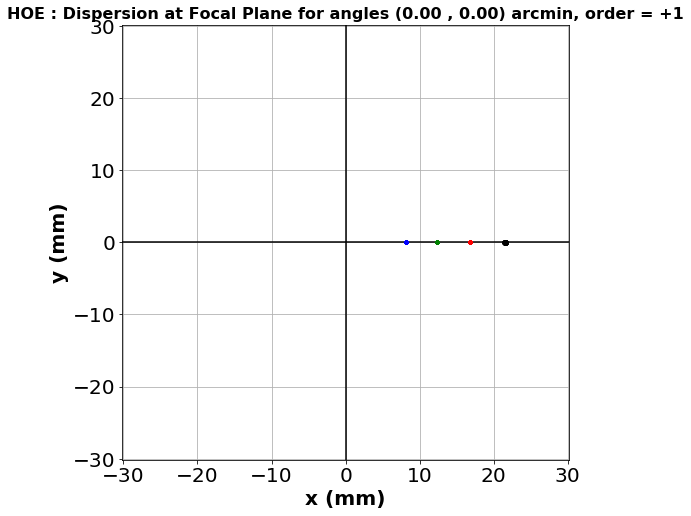

In [251]:
plt.figure(figsize=(8,8))
plt.axhline(y=0,color="k")
plt.axvline(x=0,color="k")
plt.plot(x1,y1,"b.")
plt.plot(x2,y2,"g.")
plt.plot(x3,y3,"r.")
plt.plot(x4,y4,"k.")

plt.xlim(-Det_size/2,Det_size/2.)
plt.ylim(-Det_size/2,Det_size/2)
plt.grid(True)
plt.xlabel("x (mm)",fontweight='bold')
plt.ylabel("y (mm)",fontweight='bold')

plt.title(fulltitle1,fontsize=16,fontweight='bold')
plt.savefig(figname1)

In [252]:
def Showscale(x,y,w,label,ax):
    xmin=x-w/2
    xmax=x+w/2
    ymin=y-w/2
    ymax=y+w/2
    xscale=xmax-xmin
    yscale=ymax-ymin
    ax.axhline(y=y,color="k")
    ax.axvline(x=x,color="k")
    ax.plot([xmin+xscale*.1,xmin+xscale*.1+wdt/10.],[ymin+yscale*0.8,ymin+yscale*0.8],'k-',lw=2)
    ax.text(xmin+xscale*.1, ymin+yscale*0.85, label,fontsize=16, fontweight='bold')

In [253]:
def Showstat(x,y,w,xstd,ystd,ax):
    
    xmin=x-w/2
    xmax=x+w/2
    ymin=y-w/2
    ymax=y+w/2
    xscale=xmax-xmin
    yscale=ymax-ymin
    stat_str_x="$\\sigma_x=${:2.2f} $\\mu$ m".format(xstd*1000)
    stat_str_y="$\\sigma_y=${:2.2f} $\\mu$ m".format(ystd*1000)
    print(stat_str_x)
    ax.text(xmax-xscale*.4, ymin+yscale*0.85, stat_str_x,fontsize=16, fontweight='bold')
    ax.text(xmax-xscale*.4, ymin+yscale*0.80, stat_str_y,fontsize=16, fontweight='bold')

$\sigma_x=$15.52 $\mu$ m
$\sigma_x=$2.72 $\mu$ m
$\sigma_x=$25.77 $\mu$ m
$\sigma_x=$73.33 $\mu$ m


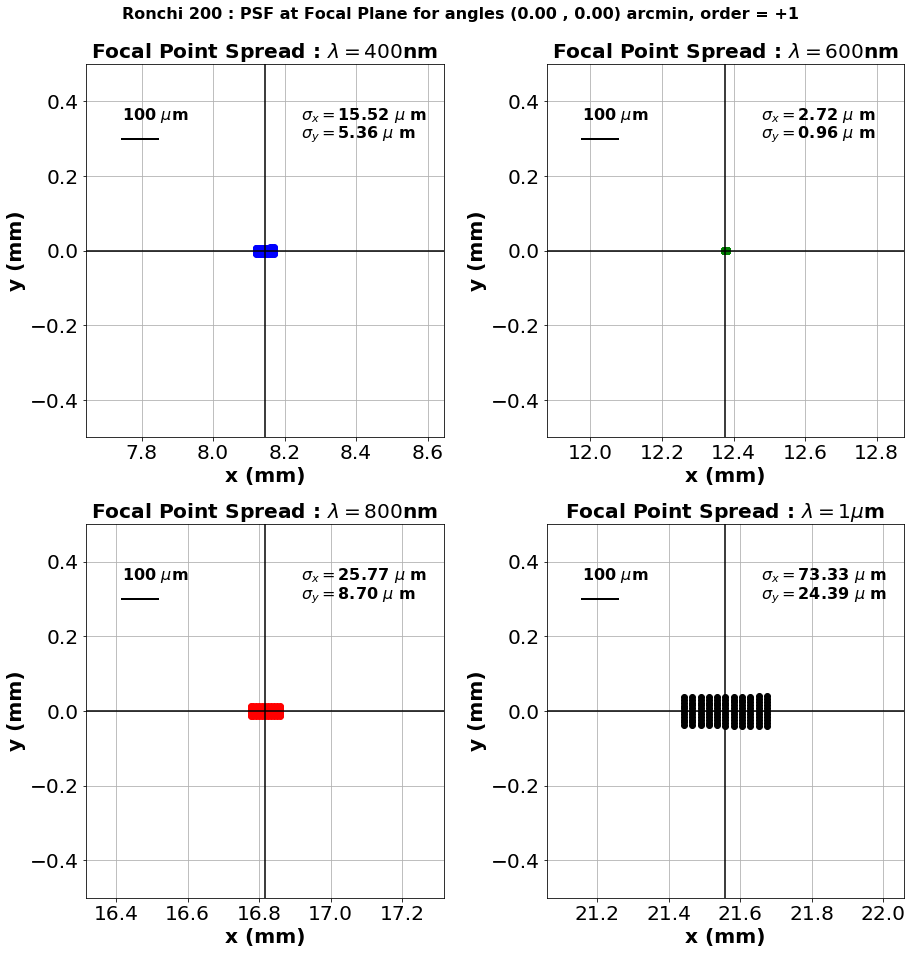

In [254]:
wdt=1.00  # with 100 microns
scalelabel="100 $\mu$m"
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(x1, y1,'bo')

xmin=x1av-wdt/2
xmax=x1av+wdt/2
ymin=y1av-wdt/2
ymax=y1av+wdt/2
xscale=xmax-xmin
yscale=ymax-ymin

#ax1.plot([xmin+xscale*.1,xmin+xscale*.1+wdt/10.],[ymin+yscale*0.8,ymin+yscale*0.8],'k-',lw=2)
#ax1.text(xmin+xscale*.1, ymin+yscale*0.85, scalelabel,fontsize=16, fontweight='bold')

Showscale(x1av,y1av,wdt,scalelabel,ax1)
Showstat(x1av,y1av,wdt,x1std,y1std,ax1)

ax1.set_xlim(x1av-wdt/2,x1av+wdt/2)
ax1.set_ylim(y1av-wdt/2,y1av+wdt/2)
ax1.set_title('Focal Point Spread : $\lambda=400$nm',fontweight='bold')
ax1.set_xlabel('x (mm)',fontweight='bold')
ax1.set_ylabel('y (mm)',fontweight='bold')
ax1.grid()
#----
ax2.plot(x2, y2,'go')
Showscale(x2av,y2av,wdt,scalelabel,ax2)
Showstat(x2av,y2av,wdt,x2std,y2std,ax2)
ax2.set_xlim(x2av-wdt/2,x2av+wdt/2)
ax2.set_ylim(y2av-wdt/2,y2av+wdt/2)
ax2.set_xlabel('x (mm)',fontweight='bold')
ax2.set_ylabel('y (mm)',fontweight='bold')
ax2.grid()
ax2.set_title('Focal Point Spread : $\lambda=600$nm',fontweight='bold')
#--------
ax3.plot(x3, y3,'ro')
Showscale(x3av,y3av,wdt,scalelabel,ax3)
Showstat(x3av,y3av,wdt,x3std,y3std,ax3)
ax3.set_xlim(x3av-wdt/2,x3av+wdt/2)
ax3.set_ylim(y3av-wdt/2,y3av+wdt/2)
ax3.set_xlabel('x (mm)',fontweight='bold')
ax3.set_ylabel('y (mm)',fontweight='bold')
ax3.grid()
ax3.set_title('Focal Point Spread : $\lambda=800$nm',fontweight='bold')
#-----
ax4.plot(x4, y4,'ko')
Showscale(x4av,y4av,wdt,scalelabel,ax4)
Showstat(x4av,y4av,wdt,x4std,y4std,ax4)
ax4.set_xlim(x4av-wdt/2,x4av+wdt/2)
ax4.set_ylim(y4av-wdt/2,y4av+wdt/2)
ax4.set_xlabel('x (mm)',fontweight='bold')
ax4.set_ylabel('y (mm)',fontweight='bold')
ax4.grid()
ax4.set_title('Focal Point Spread : $\lambda=1\mu$m',fontweight='bold')

plt.suptitle(fulltitle2,fontsize=16,fontweight='bold',y=1.02)
plt.tight_layout()
plt.savefig(figname2)

In [255]:
df_out.index.values

array(['400nm', '600nm', '800nm', '1000nm'], dtype=object)

# Interpolate

In [256]:
def find_nearest_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [257]:
from scipy.interpolate import interp1d

In [258]:
X=df_out.index.values
Y=df_out['xstd'].values*1000 # in microns units

In [259]:
X=np.array([400.,600.,800.,1000.])

In [260]:
f = interp1d(X, Y, kind='cubic')

In [261]:
Xint=np.linspace(X[0],X[-1],100)
Yint=f(Xint)

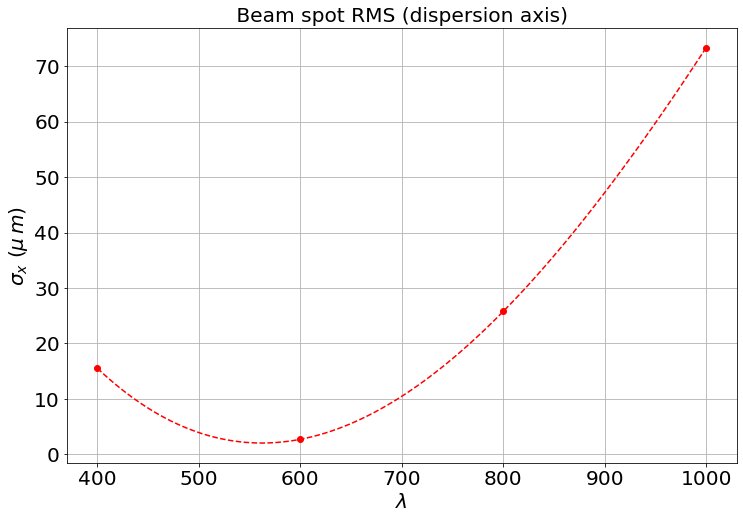

In [262]:
plt.figure(figsize=(12,8))
plt.plot(X,Y,'ro')
plt.plot(Xint,Yint,"r--")
plt.title(" Beam spot RMS (dispersion axis) ")
plt.xlabel("$\lambda$")
plt.ylabel("$\sigma_x$ ($\mu \, m$)")
plt.grid()

In [263]:
idx=find_nearest_idx(Xint,750)

In [264]:
Yint[idx]

17.5005847114968

In [265]:
Yint[idx]*16.4/1000

0.28700958926854747

In [266]:
idx=find_nearest_idx(Xint,1000)

In [267]:
Yint[idx]

73.33033882190601

In [268]:
Yint[idx]*16.4/1000

1.2026175566792585